# Polynomial Regression

In [131]:
# Import libraries
import numpy as np
import numpy.linalg as linalg
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [132]:
# Create polynomial regression function
def pol_regression(features_train, y_train, degree):
    """
    Used to create a polynomial regression using the least squares method. 
    Returns the polynomial coefficients and weights.
    
    Parameters:
        features_train (np_array) - input data
        y_train (np_array) - target output data
        degree (int) - degree of polynomial features
        
    Example usage:
        train_parameters = pol_regression(features_train, y_train, 0)
        test_parameters _ = pol_regression(x_test, y_train, 0)
        
        Format example with degree of 3 and values = [2, 3, 4]:
            | Coefficient | base_value |  new_value1 | new_value2 |
            |           1 |          2 |     4 (2^2) |    8 (2^3) |
            |           1 |          3 |     9 (3^2) |   27 (3^3) |
            |           1 |          4 |    16 (4^2) |   64 (4^3) |
    """
    # COMPONENT 1: Initialize features array
    parameters = np.ones(features_train.shape)
    
    # COMPONENT 2: Check for 0 degrees
    if degree == 0:
        # Any number to the power of 0 is 1
        # Set weights to parameters (all 1s)
        weights = np.copy(parameters)
        
    else:
        # COMPONENT 3: Perform feature expansion
        # Loop through each training element based on degree size
        for element in range(1, degree + 1):
            # Calculate polynomial coefficients into column format
            parameters = np.column_stack((parameters, features_train ** element)) # X
    
        # COMPONENT 4: Perform least squares method
        # Formula: w = (X^T * X)^-1 * X^T * y
        features = parameters.transpose().dot(parameters) # (X^T * X)
        weights = np.linalg.solve(features, parameters.transpose().dot(y_train)) # More accurate than linalg.inv
        # weights = np.linalg.inv(features).dot(parameters.transpose().dot(y_train)) # Alternative calc

    # COMPONENT 5: Return polynomial coefficients and weights
    return (parameters, weights)

In [133]:
# Get the data from CSV file
data = pd.read_csv('pol_regression.csv', sep=',', index_col=False, usecols=['x', 'y'])
data.head()

,x,y
0,0.507979,2.238321
1,2.081478,-13.104269
2,-2.090953,-10.895881
3,0.108276,-1.580098
4,3.929470,9.174928


In [134]:
# Set data parameters
features_train, labels_train = data.x.to_numpy(), data.y.to_numpy()

# Check size and shape of data
print(f"features_train: {features_train.shape}")
print(f"labels_train: {labels_train.shape}")

features_train: (20,)
labels_train: (20,)


In [135]:
# Set x_test
x_test = np.linspace(-5, 5, 20)

# Get values for multiple degrees
# Both the training set and test set must be run through the pol_regression() function to receive 
# the appropriate parameters: X - polynomial coefficients; w - weights
# I used this method to keep with a DRY format of coding

# polynomial coefficients are 1 and not needed with a degree of 0
# w0 can be passed as y_pred in plot
_, w0 = pol_regression(features_train, labels_train, 0)

_, w1 = pol_regression(features_train, labels_train, 1)
X1, _ = pol_regression(x_test, labels_train, 1)

_, w2 = pol_regression(features_train, labels_train, 2)
X2, _ = pol_regression(x_test, labels_train, 2)

_, w3 = pol_regression(features_train, labels_train, 3)
X3, _ = pol_regression(x_test, labels_train, 3)
print(f"Degree 3 weights - shape {w3.shape}: {w3}")
print(f"Degree 3 polynomial coefficients - shape {X3.shape}:")
print(X3)

_, w6 = pol_regression(features_train, labels_train, 6)
X6, _ = pol_regression(x_test, labels_train, 6)

_, w10 = pol_regression(features_train, labels_train, 10)
X10, _ = pol_regression(x_test, labels_train, 10)

Degree 3 weights - shape (4,): [ 0.44240767 -7.48952996 -2.60168246  1.25183521]
Degree 3 polynomial coefficients - shape (20, 4):
[[ 1.00000000e+00 -5.00000000e+00  2.50000000e+01 -1.25000000e+02]
 [ 1.00000000e+00 -4.47368421e+00  2.00138504e+01 -8.95356466e+01]
 [ 1.00000000e+00 -3.94736842e+00  1.55817175e+01 -6.15067794e+01]
 [ 1.00000000e+00 -3.42105263e+00  1.17036011e+01 -4.00386354e+01]
 [ 1.00000000e+00 -2.89473684e+00  8.37950139e+00 -2.42564514e+01]
 [ 1.00000000e+00 -2.36842105e+00  5.60941828e+00 -1.32854644e+01]
 [ 1.00000000e+00 -1.84210526e+00  3.39335180e+00 -6.25091121e+00]
 [ 1.00000000e+00 -1.31578947e+00  1.73130194e+00 -2.27802887e+00]
 [ 1.00000000e+00 -7.89473684e-01  6.23268698e-01 -4.92054235e-01]
 [ 1.00000000e+00 -2.63157895e-01  6.92520776e-02 -1.82242309e-02]
 [ 1.00000000e+00  2.63157895e-01  6.92520776e-02  1.82242309e-02]
 [ 1.00000000e+00  7.89473684e-01  6.23268698e-01  4.92054235e-01]
 [ 1.00000000e+00  1.31578947e+00  1.73130194e+00  2.27802887e+00

<IPython.core.display.Javascript object>


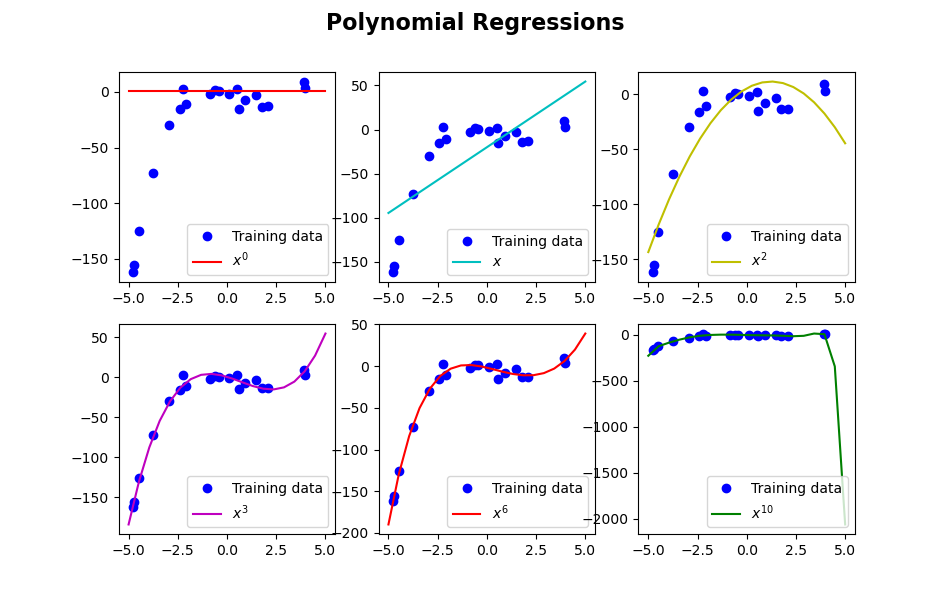

In [136]:
# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(9.5, 6))

# Calculate all y_preds: coefficients * weights
# Used to get the predicted values for the regression line
y_pred1 = X1.dot(w1)
y_pred2 = X2.dot(w2)
y_pred3 = X3.dot(w3)
y_pred6 = X6.dot(w6)
y_pred10 = X10.dot(w10)

# Set code for each plot
axes[0, 0].plot(features_train, labels_train, 'bo') # Ground truth
axes[0, 0].plot(x_test, w0, 'r') # Base values
axes[0, 0].legend(('Training data','$x^{0}$'), loc='lower right')

# Simple linear regression line
axes[0, 1].plot(features_train, labels_train, 'bo') # Ground truth
axes[0, 1].plot(x_test, y_pred1, 'c') # Linear line
axes[0, 1].legend(('Training data','$x$'), loc='lower right')

# Variants of polynomial degrees
axes[0, 2].plot(features_train, labels_train, 'bo') # Ground truth
axes[0, 2].plot(x_test, y_pred2, 'y') # Quadratic function
axes[0, 2].legend(('Training data','$x^{2}$'), loc='lower right')

axes[1, 0].plot(features_train, labels_train, 'bo') # Ground truth
axes[1, 0].plot(x_test, y_pred3, 'm') # Cubic function
axes[1, 0].legend(('Training data','$x^{3}$'), loc='lower right')

axes[1, 1].plot(features_train, labels_train, 'bo') # Ground truth
axes[1, 1].plot(x_test, y_pred6, 'r')
axes[1, 1].legend(('Training data','$x^{6}$'), loc='lower right')

axes[1, 2].plot(features_train, labels_train, 'bo') # Ground truth
axes[1, 2].plot(x_test, y_pred10, 'g')
axes[1, 2].legend(('Training data','$x^{10}$'), loc='lower right')

# Set title and save figure
fig.suptitle('Polynomial Regressions', fontsize=16, fontweight='bold')
# plt.savefig('poly_subplots.png')
plt.show()

## Evaluation

In [137]:
from sklearn.model_selection import train_test_split

def eval_pol_regression(x, y, degree, seed):
    """
    This function is used to evaluate polynomial regresions and returns
    both the training data and testing datas Root Mean Squared Error (RMSE).
    
    Parameters:
        x (np_array) - x input (ground truth) data
        y (np_array) - y predicted (output) data
        degree (int) - degree of polynomial features
        seed (int) - used to specify a random state for splitting the data
    
    Example:
        train_rmse, test_rmse = eval_pol_regression(feature_train, y_train, 10, 42)
    """
    # COMPONENT 1:
    # Split the dataset into 70/30 train and testing data, respectively
    x_train, x_test, y_train, y_test = train_test_split(x.reshape(-1, 1), y.reshape(-1, 1), 
                                                        test_size=0.3, random_state=seed)
    
    # Initialize base numpy arrays (0 to 10)
    rmse_train = np.zeros((11, 1))
    rmse_test = np.zeros((11, 1))
    
    # COMPONENT 2: 
    # Calculate the RMSEs for each degree
    for d in range(degree + 1):
        # Get new coefficients and weights
        train_co, train_w = pol_regression(x_train, y_train, d)
        test_co, _ = pol_regression(x_test, y_test, d)

        # Set y_preds to existing values if degree is 0
        if d == 0:
            # All values are 1 (x^0 = 1)
            train_y_pred = train_co
            test_y_pred = test_co
        else:
            # Calculate y predictions
            train_y_pred = train_co.dot(train_w)
            test_y_pred = test_co.dot(train_w)

        # COMPONENT 3: 
        # RMSE Formula: sqrt(sum((y_i - yhat_i)^2) / N)
        # Calculate residuals
        train_residuals = (y_train - train_y_pred) ** 2
        test_residuals = (y_test - test_y_pred) ** 2
        
        # Calculate the mean of the residuals and square root it 
        rmse_train[d] = np.sqrt(np.mean(train_residuals))
        rmse_test[d] = np.sqrt(np.mean(test_residuals))
    
    # COMPONENT 4: Return training set and test set RMSEs
    return rmse_train, rmse_test

In [140]:
# Calculate all training and testing RMSEs for each degree (0, 1, 2, 3, 6, 10)
rmse_train, rmse_test = eval_pol_regression(features_train, labels_train, 10, seed=42)
print(f"RMSE training set - shape{rmse_train.shape}:")
print(rmse_train)
print(f"RMSE testing set - shape{rmse_test.shape}:")
print(rmse_test)

RMSE training set - shape(11, 1):
[[64.4200069 ]
 [38.00653602]
 [21.03827237]
 [ 4.7197812 ]
 [ 4.06975823]
 [ 4.06083807]
 [ 3.74191808]
 [ 3.46678365]
 [ 3.45434838]
 [ 3.4474731 ]
 [ 3.28169776]]
RMSE testing set - shape(11, 1):
[[ 52.42622684]
 [ 30.67195018]
 [ 23.99194674]
 [  6.98440135]
 [  6.67009862]
 [  6.73447948]
 [  9.56257223]
 [ 13.73315369]
 [ 15.67172643]
 [ 18.882274  ]
 [158.59784776]]


<IPython.core.display.Javascript object>


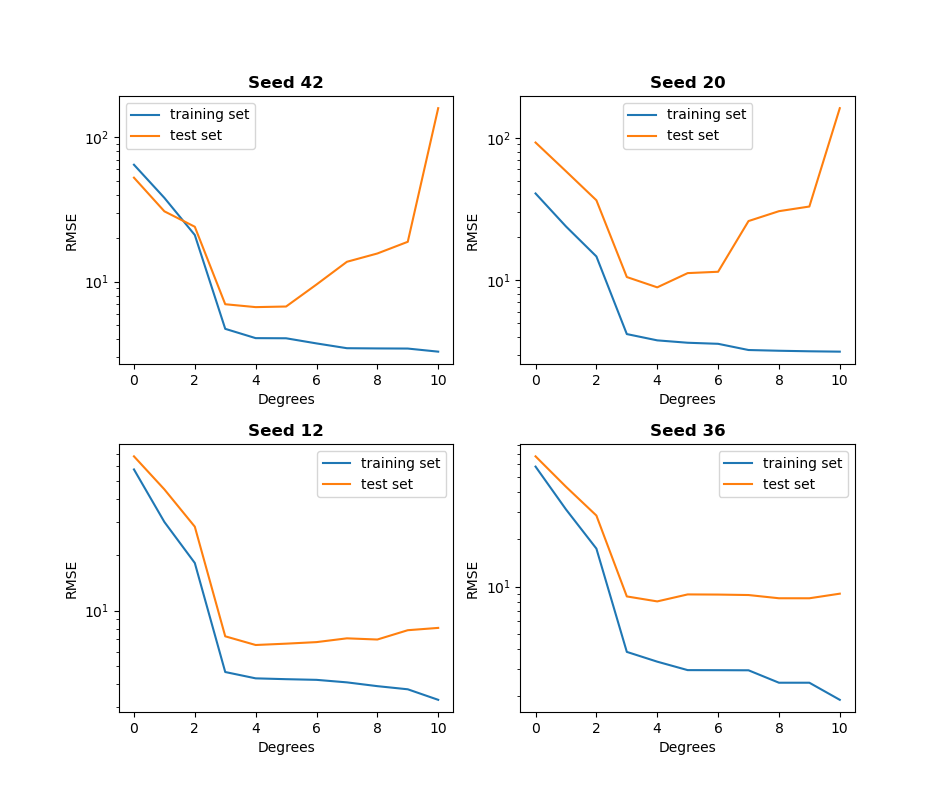

In [197]:
# Create plot
# Use range 0 to 11 - Degrees 0 to 10 inclusive
fig, axes = plt.subplots(2, 2, figsize=(9.5, 8))

x, y = 0, 0
random_seeds = [42, 20, 12, 36]
for i, seed in enumerate(random_seeds):
    rmse_train, rmse_test = eval_pol_regression(features_train, labels_train, 10, seed=seed)
    
    # Change indices
    if i == 1:
        # [0, 1]
        y += 1 # 1
    if i == 2:
        # [1, 0]
        x += 1 # 1
        y -= 1 # 0
    if i == 3:
        # [1, 1]
        y += 1 # 1
    
    # Create plots dynamically
    # [0, 0]
    axes[x, y].semilogy(range(11), rmse_train)
    axes[x, y].semilogy(range(11), rmse_test)

    # Set text and save figure
    axes[x, y].set_title(f'Seed {seed}', weight='bold')
    axes[x, y].legend(('training set', 'test set'))
    axes[x, y].set_xlabel('Degrees')
    axes[x, y].set_ylabel('RMSE')
    
# Save and show plot
plt.subplots_adjust(hspace=0.3)
# plt.savefig('rmse_poly_eval.png')
plt.show()